Data sets available at:

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv  
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [486]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm

In [487]:
df1 = pd.read_csv(r"D:\Data_sets\winequality-red.csv", delimiter=';')
df2 = pd.read_csv(r"D:\Data_sets\winequality-white.csv", delimiter=';')

In [488]:
df1['type'] = 'red'
df2['type'] = 'white'

In [489]:
wine = pd.concat([df1,df2])
wine.reset_index(inplace=True, drop=True)
wine.columns = wine.columns.str.replace(" ","_")

In [490]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [491]:
wine.groupby('type')[['quality']].describe().unstack('type')

quality             
type           red        white
count  1599.000000  4898.000000
mean      5.636023     5.877909
std       0.807569     0.885639
min       3.000000     3.000000
25%       5.000000     5.000000
50%       6.000000     6.000000
75%       6.000000     6.000000
max       8.000000     9.000000

In [492]:
wine.groupby('type')[['quality']].quantile([0.25,0.75]).unstack('type')

quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0

In [493]:
red_wine = wine.loc[wine['type']=='red','quality']
white_wine = wine.loc[wine['type']=='white','quality']

In [494]:
sns.set_style('dark')

In [495]:
sns.distplot(red_wine, norm_hist=True, kde=False, color='red', label='red wine')
sns.distplot(white_wine, norm_hist=True, kde=False, color='white', label='white wine')

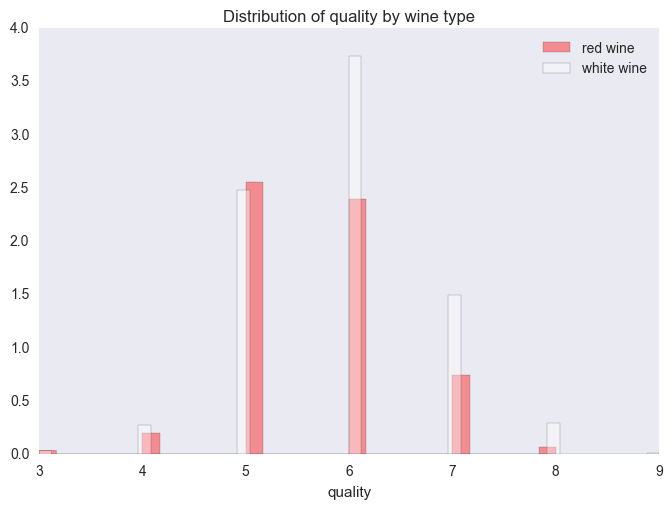

In [496]:
plt.title("Distribution of quality by wine type")
plt.legend()
plt.show()

In [497]:
wine.groupby('type')[['quality']].agg(['std'])

,quality
,std
type,
red,0.807569
white,0.885639


In [498]:
#ttest independent sample
tstat, pvalue, degrees_of_freedom = sm.stats.ttest_ind(red_wine, white_wine)

In [499]:
tstat

-9.6856495541876964

In [500]:
pvalue

4.8880690442015081e-22

In [501]:
degrees_of_freedom

6495.0

In [502]:
#correlation matrix
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [503]:
def take_sample(data_frame, replace=False, n=200):
    return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]

In [504]:
red_sample = take_sample(wine[wine['type']=='red'])
white_sample = take_sample(wine[wine['type']=='white'])

In [505]:
wine_sample = pd.concat([red_sample, white_sample])

In [506]:
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index),1.,0.)

In [507]:
pd.crosstab(wine.in_sample, wine.type, margins=True)

type,red,white,All
in_sample,,,
0.0,1399,4698,6097
1.0,200,200,400
All,1599,4898,6497


In [509]:
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci":False, "x_jitter":0.25, "y_jitter":0.25}, hue='type', diag_kind='hist',\
diag_kws={'bins':10, "alpha":1.0}, palette=dict(red='red',white='white'), markers =["o","s"], vars=['quality', 'alcohol', 'residual_sugar'])
plt.suptitle("Histograms and scatter plots of quality, alcohol and residual sugar", fontsize=14, horizontalalignment='center',verticalalignment='top',x=0.5,y=0.999)

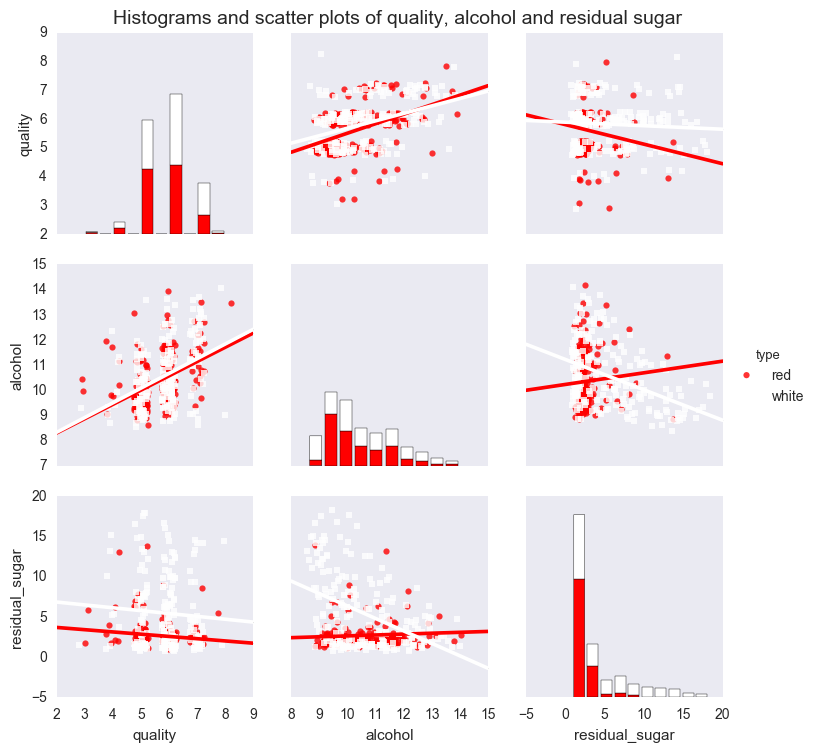

In [510]:
g.fig

In [511]:
formula = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar\
+ sulphates + total_sulfur_dioxide + volatile_acidity'

In [512]:
lm = ols(formula, data=wine).fit()

In [513]:
#non standardised data
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 14 May 2017   Prob (F-statistic):               0.00
Time:                        14:54:15   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000        32.447    79.079
alcohol                  0.2670      0.017     15.963      0.000         0.234     0.300
chlorides               -0.4837      0.333     -1.454      0.146        -1.136     0.168
citric_acid             -0.1097      0.080     -1.377      0.168        -0.266     0.046
density                -54.9669     12.137     -4.529      0.000       -78.760   -31.173
fixed_acidity            0.0677      0.016      4.346      0.000         0.037     0.098
free_sulfur_dioxide      0.0060      0.001      7.948      0.000         0.004     0.007
pH                       0.4393      0.090      4.861      0.000         0.262     0.616
residual_sugar           0.0436      0.005      8.449      0.000         0.033     0.054
sulphates                0.7683      0.076     10.092      0.000         0.619     0.917
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000        -0.003    -0.002
volatile_acidity        -1.3279      0.077    -17.162      0.000        -1.480    -1.176
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [514]:
dependent_variable = wine['quality']

In [515]:
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]

In [516]:
independent_variables_standardised = (independent_variables - independent_variables.mean()) / independent_variables.std()

In [517]:
wine_standardised = pd.concat([dependent_variable, independent_variables_standardised], axis=1)

In [519]:
#standardised variables have mean ~0 and standard deviation of 1 
wine_standardised.describe()

,quality,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
count,6497.000000,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,5.818378,-1.231775e-14,1.278966e-14,4.807301e-14,2.181060e-12,9.396824e-16,-6.367933e-17,-3.317152e-14,-2.252111e-15,-6.607989e-15,-5.225926e-16,-2.652262e-14
std,0.873255,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,3.000000,-2.089189e+00,-1.342536e+00,-2.192664e+00,-2.529997e+00,-2.634386e+00,-1.663455e+00,-3.100376e+00,-1.017956e+00,-2.091774e+00,-1.941631e+00,-1.577208e+00
25%,5.000000,-8.315512e-01,-5.147590e-01,-4.722972e-01,-7.858922e-01,-6.288845e-01,-7.620156e-01,-6.748102e-01,-7.657389e-01,-6.805395e-01,-6.854795e-01,-6.661100e-01
50%,6.000000,-1.608107e-01,-2.578628e-01,-5.940918e-02,6.448391e-02,-1.660764e-01,-8.593639e-02,-5.287017e-02,-5.135217e-01,-1.429263e-01,3.990360e-02,-3.016707e-01
75%,6.000000,6.776148e-01,2.559297e-01,4.911081e-01,7.647937e-01,3.738663e-01,5.901428e-01,6.312639e-01,5.584015e-01,4.618885e-01,7.122099e-01,3.664680e-01
max,9.000000,3.695947e+00,1.584097e+01,9.230570e+00,1.476765e+01,6.698910e+00,1.456245e+01,4.922650e+00,1.268585e+01,9.870119e+00,5.736815e+00,7.533774e+00


In [520]:
lm_standardised = ols(formula, data=wine_standardised).fit()

In [521]:
lm_standardised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 14 May 2017   Prob (F-statistic):               0.00
Time:                        14:58:52   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                5.8184      0.009    637.785      0.000         5.800     5.836
alcohol                  0.3185      0.020     15.963      0.000         0.279     0.358
chlorides               -0.0169      0.012     -1.454      0.146        -0.040     0.006
citric_acid             -0.0159      0.012     -1.377      0.168        -0.039     0.007
density                 -0.1648      0.036     -4.529      0.000        -0.236    -0.093
fixed_acidity            0.0877      0.020      4.346      0.000         0.048     0.127
free_sulfur_dioxide      0.1060      0.013      7.948      0.000         0.080     0.132
pH                       0.0706      0.015      4.861      0.000         0.042     0.099
residual_sugar           0.2072      0.025      8.449      0.000         0.159     0.255
sulphates                0.1143      0.011     10.092      0.000         0.092     0.137
total_sulfur_dioxide    -0.1402      0.016     -8.969      0.000        -0.171    -0.110
volatile_acidity        -0.2186      0.013    -17.162      0.000        -0.244    -0.194
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                         9.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""